In [10]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10

In [17]:
#grabbing the mnist dataset
((X_train,Y_train),(X_test,Y_test)) = cifar10.load_data()
# X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
# X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
# X_train = X_train.astype("float32") / 255.0
# X_test = X_test.astype("float32") / 255.0

In [18]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [20]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [21]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\lenovo\anaconda3\envs\dl_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\lenovo\anaconda3\envs\dl_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lenovo\anaconda3\envs\dl_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\lenovo\anaconda3\envs\dl_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\lenovo\anaconda3\envs\dl_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\lenovo\anaconda3\envs\dl_env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 32, 32, 3)


In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       980
           1       0.78      0.99      0.87      1135
           2       0.86      0.75      0.80      1032
           3       0.66      0.85      0.75      1010
           4       0.76      0.73      0.74       982
           5       0.84      0.25      0.39       892
           6       0.81      0.87      0.84       958
           7       0.82      0.88      0.85      1028
           8       0.78      0.67      0.72       974
           9       0.68      0.69      0.68      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.76      0.75     10000
weighted avg       0.78      0.77      0.76     10000



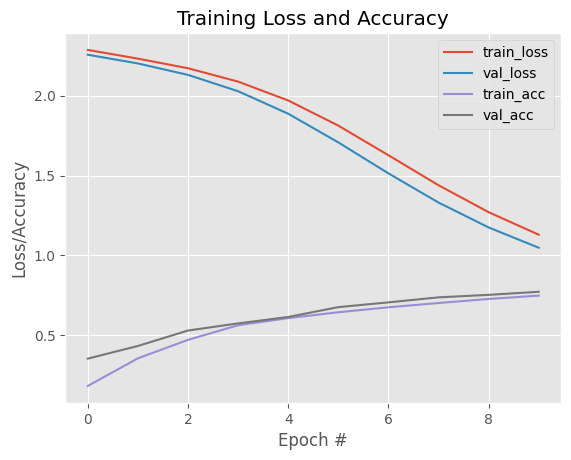

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()